In [1]:
# Exercise 1 – Create a Simple Excel Calculator using openpyxl

from openpyxl import Workbook

# Create a new workbook and select the active worksheet
workbook = Workbook()
worksheet = workbook.active

# Add labels for the input numbers
worksheet['A1'] = "First number ==>"
worksheet['A2'] = "Second number ==>"

# Insert input numbers into cells B1 and B2
worksheet['B1'] = 2
worksheet['B2'] = 8

# Add a formula to multiply B1 and B2
worksheet['B3'] = "=B1*B2"

# Save and close the workbook
workbook.save("calculator.xlsx")
workbook.close()

In [3]:
# Exercise 2: Find plants that are not in stock (with file upload in Colab)

from openpyxl import load_workbook
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Load the workbook from the uploaded file
file_name = list(uploaded.keys())[0]
wb = load_workbook(io.BytesIO(uploaded[file_name]))
ws = wb.active

# Start from the second row
row = 2

while True:
    plant_name = ws.cell(row=row, column=1).value  # Column A
    stock_status = ws.cell(row=row, column=8).value  # Column H

    if plant_name is None:
        break  # Reached the end of the data

    if stock_status == "No":
        print(plant_name)

    row += 1

wb.close()

Saving Plants.xlsx to Plants.xlsx
Honeysuckle
Lupin
Skimmia
Rosa
Gladioli


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
# Exercise 3: Load Excel, filter data, and write it back using OpenPyXL

import pandas as pd
from openpyxl import load_workbook
from google.colab import files
import io

# Upload the Excel file
uploaded = files.upload()

# Load file name from upload
file_name = list(uploaded.keys())[0]

# Read Excel into pandas DataFrame
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# Filter rows where 'Sales' > 1000
filtered_df = df[df['Sales'] > 1000]

# Save the filtered DataFrame back to Excel
output_filename = 'filtered_data.xlsx'
with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
    filtered_df.to_excel(writer, index=False, sheet_name='Filtered')

# Offer download link
files.download(output_filename)

Saving data.xlsx to data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving productSales.xlsx to productSales (1).xlsx


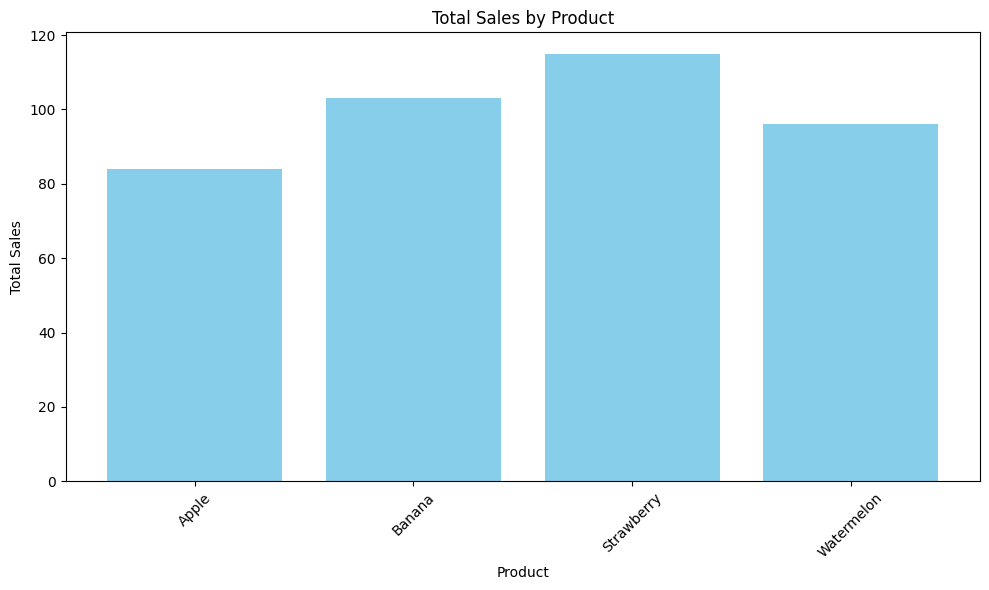

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Exercise 4: Load Excel, group data, plot chart, export to new file

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload the Excel file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Read the Excel file into a DataFrame
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# Group by 'product' and sum the 'sales'
grouped = df.groupby('product')['sales'].sum().reset_index()

# Plot the sales per product
plt.figure(figsize=(10,6))
plt.bar(grouped['product'], grouped['sales'], color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export grouped data to a new Excel file (without writer.save() and writer.close())
output_filename = 'sales_report.xlsx'
with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
    grouped.to_excel(writer, index=False, sheet_name='Summary')

# Offer download of result
files.download(output_filename)
